In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [32]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
x = data.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
# Elblow method to find the value of K
from sklearn.cluster import KMeans

clusters = range(1,11)
wcss = []
for cluster in clusters:
    km = KMeans(n_clusters=cluster,random_state=0 )
    km.fit(x)
    wcss.append(km.inertia_)

Text(0, 0.5, 'wcss value')

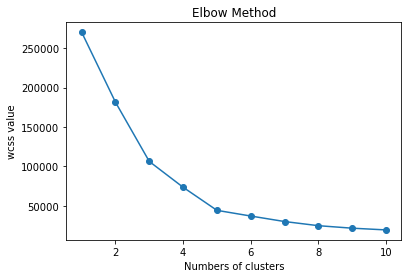

In [20]:
plt.plot(range(1,11), wcss, '-o')
plt.title('Elbow Method')
plt.xlabel('Numbers of clusters')
plt.ylabel('wcss value')

In [23]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    km = KMeans(n_clusters = k)
    pred = km.fit_predict(x)
    
    score = silhouette_score(x,pred)
    print("For cluster ={},Silhoutte score is ={})".format(k,score))

For cluster =2,Silhoutte score is =0.2968969162503008)
For cluster =3,Silhoutte score is =0.46761358158775435)
For cluster =4,Silhoutte score is =0.4931963109249047)
For cluster =5,Silhoutte score is =0.553931997444648)
For cluster =6,Silhoutte score is =0.53976103063432)
For cluster =7,Silhoutte score is =0.5264283703685728)
For cluster =8,Silhoutte score is =0.45492755850983463)
For cluster =9,Silhoutte score is =0.4607224274992025)
For cluster =10,Silhoutte score is =0.45275118302579015)


- We have to check which cluter have the maximum silhouette_score, and here it is 5 

In [24]:
## considering the value of k as 5

km = KMeans(n_clusters =5)
y_pred = km.fit_predict(x)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Text(0, 0.5, 'Spending Score')

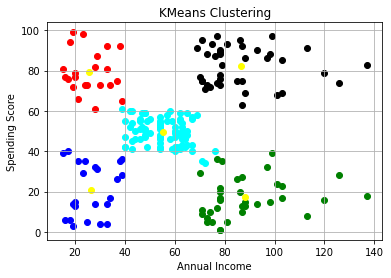

In [36]:
plt.grid()
plt.scatter(x[y_pred==0,0],x[y_pred==0,1], c='red')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1], c='blue')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1], c='green')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1], c='black')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1], c='cyan')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c ='Yellow')

plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')